In [131]:
#comparison of HDST to Slide_seqV2 data 

In [1]:
#load libraries
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import datetime

now = datetime.datetime.now()
import scipy.optimize
import scipy.stats
import os

%pylab inline

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

import scanpy as sc

Populating the interactive namespace from numpy and matplotlib


In [4]:

dge_path = "/broad/macosko/data/libraries/2020-02-26_Puck_200127_15/GRCm38.81.exonic+intronic/alignment/Puck_200127_15.digital_expression.txt.gz"
dge = pd.read_csv(dge_path, header = 0, index_col = 0, engine = 'python', sep = '\t')#check the first row if it is not bead barcodes add skiprows = X

In [5]:
dge
dge = dge.T
dge = dge.reset_index()
dge = dge.rename(columns={'index':'barcode'})

In [7]:

coords_barcodes = pd.read_csv("/broad/macosko/data/libraries/2020-02-26_Puck_200127_15/GRCm38.81.exonic+intronic/barcode_matching/Puck_200127_15_matched_bead_barcodes.txt",header = None)
coords_locations = pd.read_csv("/broad/macosko/data/libraries/2020-02-26_Puck_200127_15/GRCm38.81.exonic+intronic/barcode_matching/Puck_200127_15_matched_bead_locations.txt", sep = '\t', header = None)


In [8]:

coords = coords_locations[[1,2]]
coords.set_axis(['xcoord','ycoord'], axis=1, inplace=True)
coords['barcode'] = coords_barcodes
coords.reset_index()
coords.set_index('barcode')
coords

,xcoord,ycoord,barcode
0,10.298,3031.2,TTTTTTTTTTTTTT
1,3352.500,2498.0,GCTAGGATTGTAAA
2,3687.400,4701.0,CACAACAACGTTGG
3,2706.900,2504.5,AATGACGGCAATGC
4,2786.800,3984.3,TATTTTAGATCTCA
...,...,...,...
21719,3368.200,5458.2,GCCGCCCGTTGGCT
21720,4522.000,2138.6,ACAATAAGGGTCCT
21721,3968.500,3858.4,TCTTCACTATCGCT
21722,5296.600,2564.6,AAGAATTACTAAGC


In [9]:
#now load the cropping data for this puck
cropped_barcodes = pd.read_csv("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/HDST_MOB_data/cropping_olfactory_bulb/output.txt",header = None)
cropped_barcodes = cropped_barcodes.rename(columns={0:"cropping"})

In [10]:
coords["cropping"] = cropped_barcodes["cropping"]
coords.drop(coords[coords['cropping'] > 0].index, inplace = True)

In [11]:
coords = coords.drop('cropping', axis=1)

In [12]:


df_merged = dge.merge(coords, right_on='barcode', left_on='barcode')
counts = df_merged.drop(['xcoord', 'ycoord'], axis=1)

In [13]:
coords.min(axis=0)

xcoord             733.87
ycoord             1139.6
barcode    AAAAAAAATGGTAA
dtype: object

(20774,)
(20774, 4)


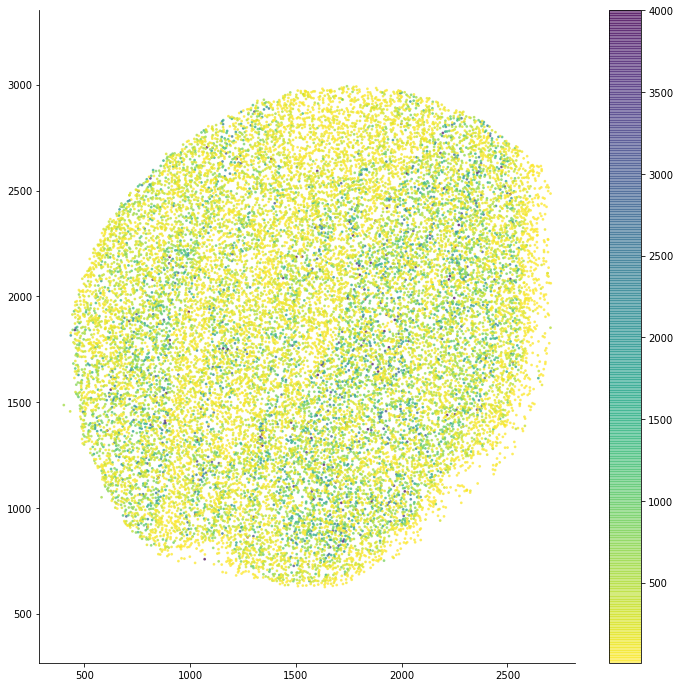

In [14]:
counts_gr0_barcodestotals = np.sum(counts.drop('barcode', axis=1), axis=1)
print(counts_gr0_barcodestotals.shape)
#coords = coords.reset_index()
coords['total_counts'] = counts_gr0_barcodestotals
print(coords.shape)
coords.head(5)
plt.figure(figsize = (12,12))
plt.set_cmap('viridis_r')
plt.scatter(coords['xcoord']*0.549, coords['ycoord']*0.549, c=coords['total_counts'], s=3.16, alpha=0.6, vmax = 4000);
plt.axis('equal');
plt.colorbar();
plt.savefig("{}/{}.pdf".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/HDST_MOB_data", "total_counts_Slide_seqV2"), dpi = 200)
plt.show();






['Penk', 'Doc2g', 'Kctd12']


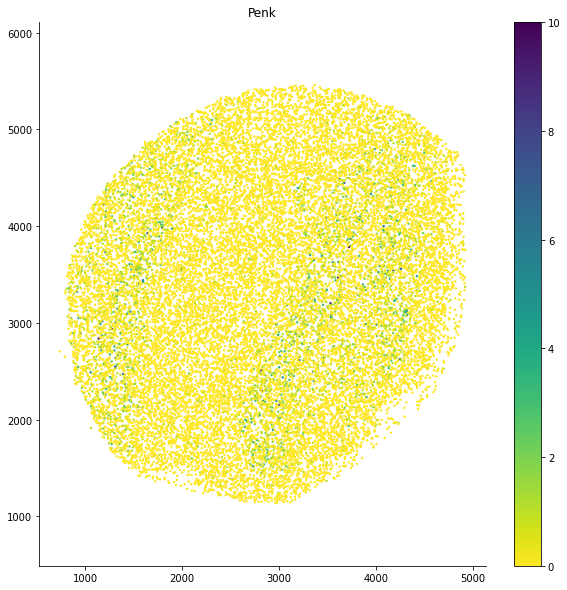

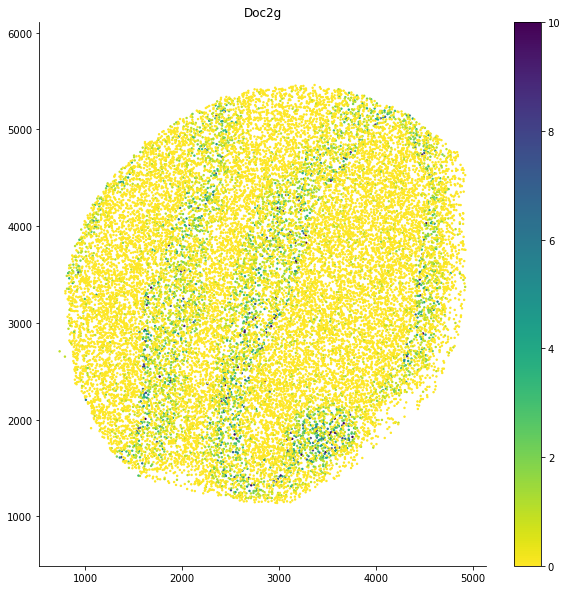

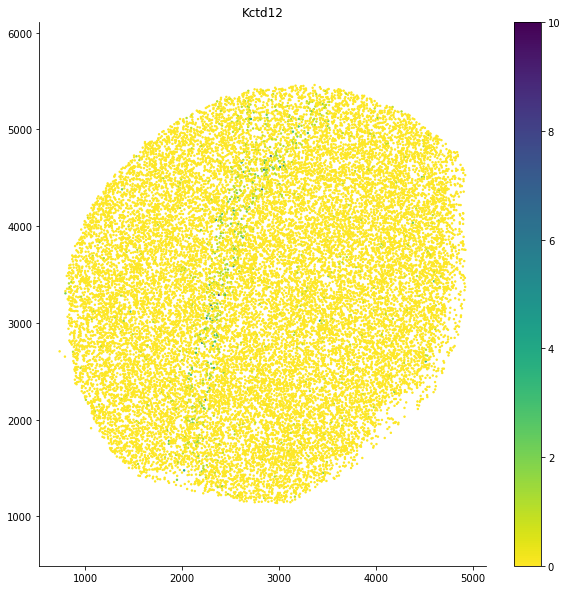

In [15]:
def plot_one_gene(gene):
    figsize(10, 10)
    pyplot.set_cmap('viridis_r')
    plt.scatter(coords['xcoord'], coords['ycoord'], c=counts[gene], s=2, alpha=1, vmax = 10)
    plt.axis('equal')
    plt.vmin = 0
    plt.title('{}'.format(gene))
    plt.colorbar();
    #save_result(gene)
    #plt.savefig("{}/{}.pdf".format("/broad/macosko/bstickels/data/slideseq/slideseq/covid_plots/Puck_200115_08", gene), dpi = 200)
    plt.show()
    
#interesting_genes = ['VIM','EPCAM','OLFM4','SLC12A2','LEFTY1','DCN','CFP','LUM']
interesting_genes = ['Penk', 'Doc2g', 'Kctd12']
print(interesting_genes)
for g in interesting_genes:
    plot_one_gene(gene=g)

In [16]:
#next we have to load the HDST data 
import csv
from collections import defaultdict
from pandas import DataFrame

HDST10um = pd.read_table('/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/HDST_MOB_data/CN13_D2_unmodgtf_filtered_red_ut_5x_final.tsv')



In [17]:
len(HDST10um.bc.unique())

32485

In [18]:
# skip header
HDST10 = HDST10um.pivot(index='bc', columns='gene', values='count')

In [19]:
HDST10 = HDST10.fillna(0)

In [20]:
#next we need to make these barcodes into x,m y coordinates
coordinates = HDST10.index.str.split('x', expand = True)
HDST10coords = pd.MultiIndex.to_frame(coordinates, index = False)
HDST10coords['total_counts'] = np.sum(HDST10, axis = 1).reset_index(drop=True)

In [21]:
totals = np.sum(HDST10, axis = 1)

In [22]:
HDST10coords[0] = pd.to_numeric(HDST10coords[0])
HDST10coords[1] = pd.to_numeric(HDST10coords[1])
HDST10coords['total_counts'] = pd.to_numeric(HDST10coords['total_counts'])

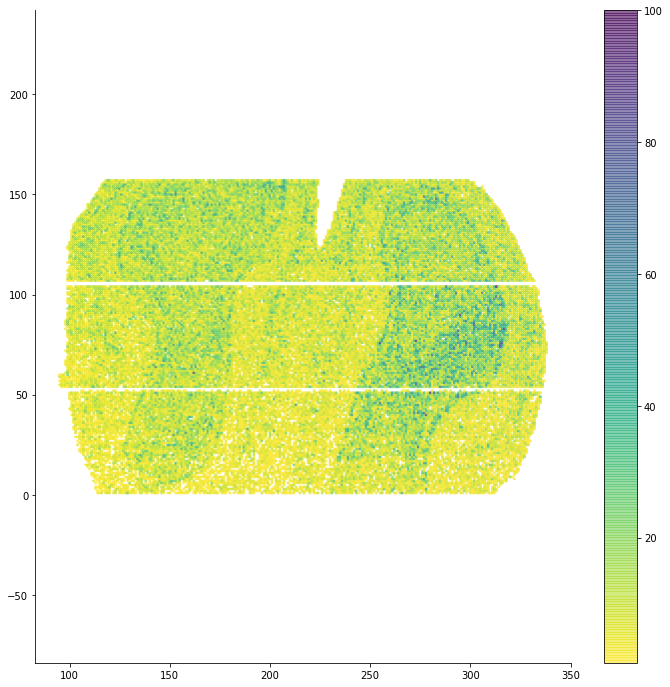

In [23]:
plt.figure(figsize = (12,12))
plt.set_cmap('viridis_r')
plt.scatter(HDST10coords[0], HDST10coords[1], c=HDST10coords['total_counts'], s=4, alpha=0.6);
plt.axis('equal');
plt.colorbar();
plt.savefig("{}/{}.pdf".format("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/HDST_MOB_data", "HDST_total_counts"), dpi = 200)
plt.show();



['Penk', 'Doc2g', 'Kctd12']


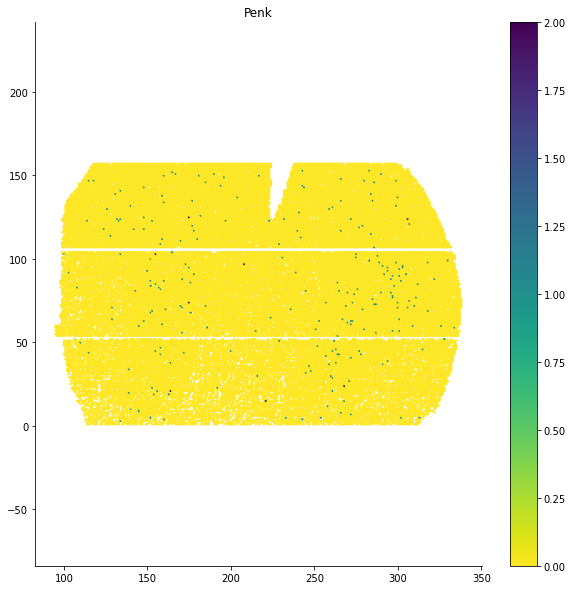

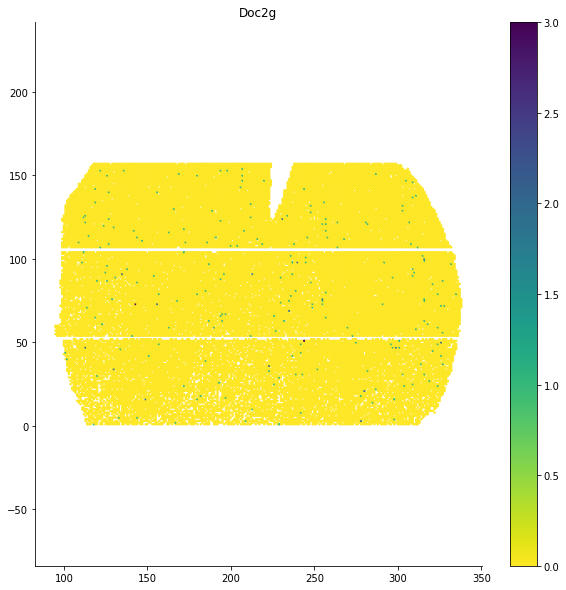

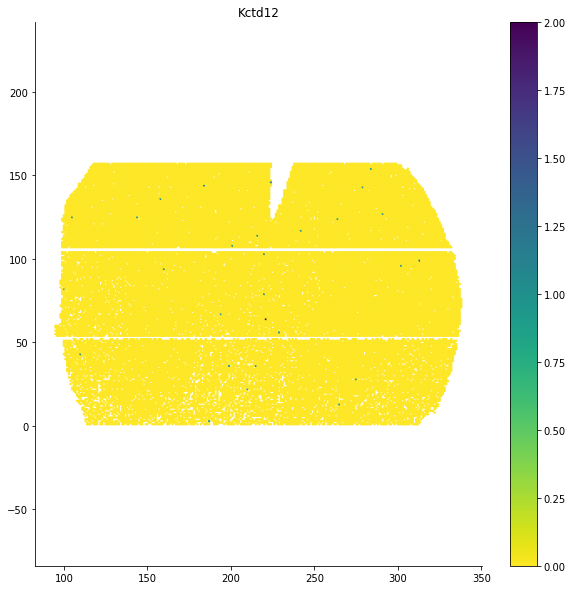

In [24]:
def plot_one_gene(gene):
    figsize(10, 10)
    pyplot.set_cmap('viridis_r')
    plt.scatter(HDST10coords[0], HDST10coords[1], c=HDST10[gene], s=2, alpha=1)
    plt.axis('equal')
    plt.vmin = 0
    plt.title('{}'.format(gene))
    plt.colorbar();
    #save_result(gene)
    #plt.savefig("{}/{}.pdf".format("/broad/macosko/bstickels/data/slideseq/slideseq/covid_plots/Puck_200115_08", gene), dpi = 200)
    plt.show()
    
#interesting_genes = ['VIM','EPCAM','OLFM4','SLC12A2','LEFTY1','DCN','CFP','LUM']
interesting_genes = ['Penk', 'Doc2g', 'Kctd12']
print(interesting_genes)
for g in interesting_genes:
    plot_one_gene(gene=g)

/broad/macosko/bstickels/bobp3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/broad/macosko/bstickels/bobp3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/broad/macosko/bstickels/bobp3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'uapper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


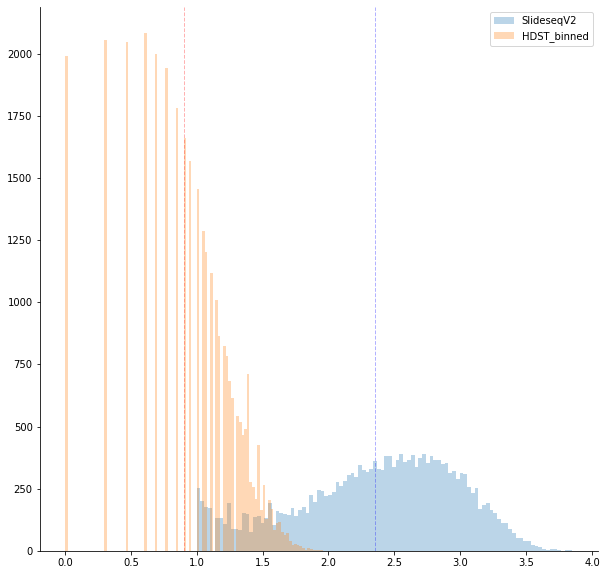

In [25]:
bins = numpy.linspace(0, 5, 1000)

pyplot.hist(log10(coords['total_counts']), bins=100, alpha=0.3, label='SlideseqV2')
pyplot.hist(log10(HDST10coords['total_counts']), bins=100, alpha=0.3, label='HDST_binned')
pyplot.legend(loc='uapper right')

plt.axvline(log10(coords['total_counts']).mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.3)
plt.axvline(log10(HDST10coords['total_counts']).mean(), color='r', linestyle='dashed', linewidth=1, alpha=0.3)
plt.savefig("/broad/macosko/bstickels/data/slideseq/slideseq/slideseqv2/HDST_MOB_data/histogram_counts.pdf", dpi = 200)
plt.show()

#make this a bit smoother